<a href="https://colab.research.google.com/github/antonioferreira2005/6-7-edition/blob/main/hackathon_december.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df='https://raw.githubusercontent.com/samsung-ai-course/6-7-edition/refs/heads/main/Hackthon%20classification/6h%20edition/data/Hotel%20Reservations.csv'

df=pd.read_csv(df)
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


<Axes: xlabel='no_of_special_requests', ylabel='count'>

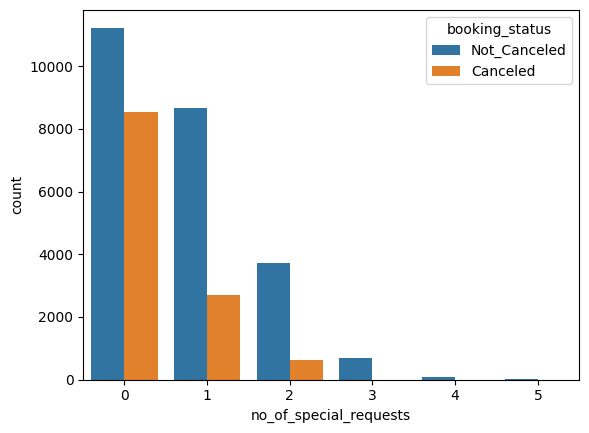

In [15]:
sns.countplot(x='no_of_special_requests', hue='booking_status', data=df)


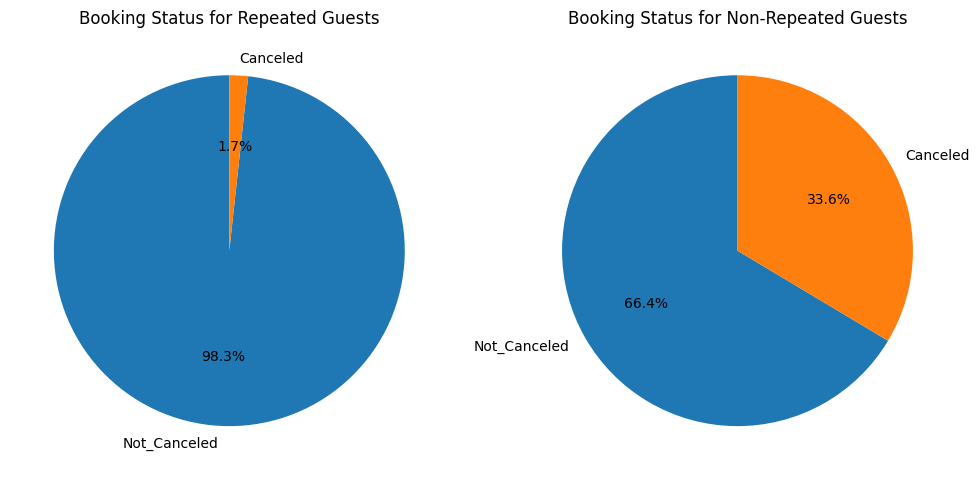

In [7]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for repeated guests
repeated_guests = df[df['repeated_guest'] == 1]
repeated_counts = repeated_guests['booking_status'].value_counts()
ax1.pie(repeated_counts, labels=repeated_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Booking Status for Repeated Guests')

# Pie chart for non-repeated guests
non_repeated_guests = df[df['repeated_guest'] == 0]
non_repeated_counts = non_repeated_guests['booking_status'].value_counts()
ax2.pie(non_repeated_counts, labels=non_repeated_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Booking Status for Non-Repeated Guests')

plt.tight_layout()
plt.show()

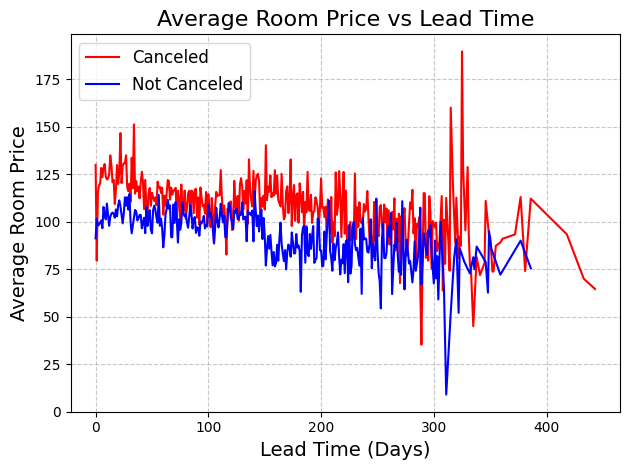

In [8]:
import matplotlib.pyplot as plt

# Calculate average prices for canceled and not canceled
avg_price_canceled = df[df['booking_status'] == 'Canceled'].groupby('lead_time')['avg_price_per_room'].mean()
avg_price_not_canceled = df[df['booking_status'] == 'Not_Canceled'].groupby('lead_time')['avg_price_per_room'].mean()

# Plot average trends
plt.plot(avg_price_canceled.index, avg_price_canceled.values,
         color='red', label='Canceled')

plt.plot(avg_price_not_canceled.index, avg_price_not_canceled.values,
         color='blue', label='Not Canceled')

# Enhance clarity
plt.title('Average Room Price vs Lead Time', fontsize=16)
plt.xlabel('Lead Time (Days)', fontsize=14)
plt.ylabel('Average Room Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

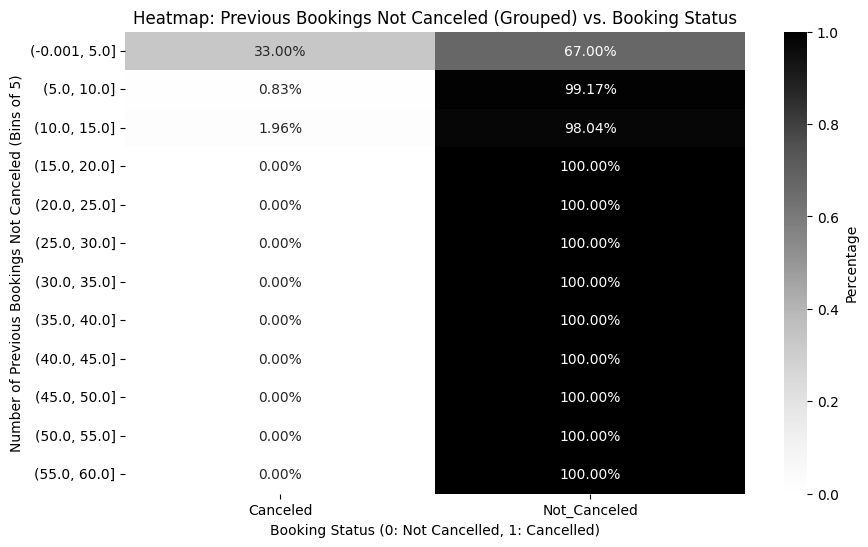

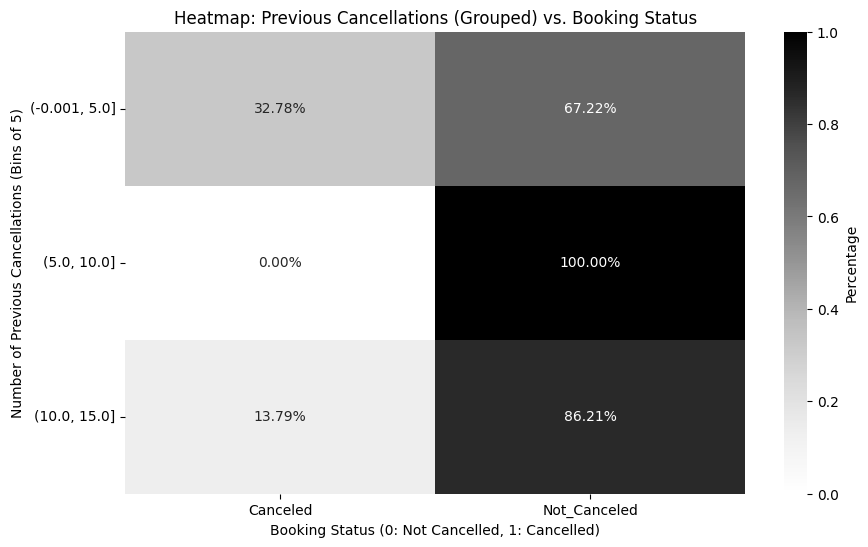

In [9]:
# Create bins for 'no_of_previous_bookings_not_canceled'
df['previous_bookings_bins'] = pd.cut(df['no_of_previous_bookings_not_canceled'], bins=np.arange(0, df['no_of_previous_bookings_not_canceled'].max() + 5, 5), include_lowest=True)

# Create a cross-tabulation with normalized values (percentages)
cross_tab = pd.crosstab(df['previous_bookings_bins'], df['booking_status'], normalize='index')

# Plot the heatmap with black-and-white color scheme and grouped bins
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Greys', fmt='.2%', cbar_kws={'label': 'Percentage'})
plt.title('Heatmap: Previous Bookings Not Canceled (Grouped) vs. Booking Status')
plt.xlabel('Booking Status (0: Not Cancelled, 1: Cancelled)')
plt.ylabel('Number of Previous Bookings Not Canceled (Bins of 5)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()



# Create bins for 'no_of_previous_cancellations'
df['previous_cancellations_bins'] = pd.cut(df['no_of_previous_cancellations'], bins=np.arange(0, df['no_of_previous_cancellations'].max() + 5, 5), include_lowest=True)

# Create a cross-tabulation with normalized values (percentages)
cross_tab = pd.crosstab(df['previous_cancellations_bins'], df['booking_status'], normalize='index')

# Plot the heatmap with black-and-white color scheme and grouped bins
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Greys', fmt='.2%', cbar_kws={'label': 'Percentage'})
plt.title('Heatmap: Previous Cancellations (Grouped) vs. Booking Status')
plt.xlabel('Booking Status (0: Not Cancelled, 1: Cancelled)')
plt.ylabel('Number of Previous Cancellations (Bins of 5)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()

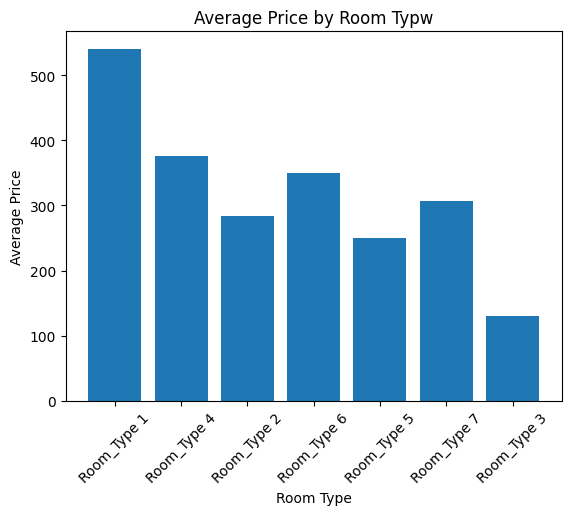

In [12]:
plt.bar(df['room_type_reserved'],df['avg_price_per_room'])
plt.xticks(rotation=45)
plt.title('Average Price by Room Typw')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()